In [2]:
import pycaret

In [3]:
from pycaret.datasets import get_data
all_databasets = pycaret.datasets.get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [4]:
dataset_name = 'heart_disease'
data = pycaret.datasets.get_data(dataset_name)

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [5]:
from pycaret.classification import *

clf1 = setup(data = data, target = "Disease", session_id=123, log_experiment=True, experiment_name='experiment1', silent=True)

,Description,Value
0,session_id,123
1,Target,Disease
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(270, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8614,0.0000,0.7861,0.8986,0.8284,0.7152,0.7296,0.0040
lda,Linear Discriminant Analysis,0.8614,0.9066,0.7861,0.8986,0.8284,0.7152,0.7296,0.0040
lr,Logistic Regression,0.8564,0.9117,0.8222,0.8612,0.8322,0.7084,0.7209,0.4230
nb,Naive Bayes,0.8404,0.8678,0.8083,0.8378,0.8116,0.6746,0.6864,0.0040
catboost,CatBoost Classifier,0.8404,0.9139,0.7750,0.8748,0.8073,0.6744,0.6931,0.5460
rf,Random Forest Classifier,0.8351,0.9112,0.7750,0.8534,0.8025,0.6634,0.6771,0.0390
et,Extra Trees Classifier,0.8298,0.9062,0.7833,0.8330,0.7966,0.6515,0.6642,0.0340
xgboost,Extreme Gradient Boosting,0.8190,0.8939,0.7611,0.8343,0.7872,0.6307,0.6425,0.0610
lightgbm,Light Gradient Boosting Machine,0.8135,0.8930,0.7736,0.8202,0.7839,0.6210,0.6341,0.1230
gbc,Gradient Boosting Classifier,0.8088,0.8906,0.7514,0.8187,0.7722,0.6110,0.6238,0.0140


In [7]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.9300,0.6471,0.8462,0.7333,0.5645,0.5783
1,0.7895,0.8641,0.7647,0.7647,0.7647,0.5742,0.5742
2,0.8947,0.9034,0.8824,0.8824,0.8824,0.7871,0.7871
3,0.8108,0.8824,0.6875,0.8462,0.7586,0.6058,0.6146
4,0.8378,0.9250,0.8235,0.8235,0.8235,0.6735,0.6735
Mean,0.8245,0.9010,0.7610,0.8326,0.7925,0.6410,0.6456
SD,0.0394,0.0250,0.0861,0.0388,0.0538,0.0824,0.0792


In [9]:
Tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.8750,0.6250,0.8333,0.7143,0.5529,0.5673
1,0.9474,1.0000,0.8750,1.0000,0.9333,0.8902,0.8956
2,0.8947,0.9318,0.8750,0.8750,0.8750,0.7841,0.7841
3,0.7895,0.8409,1.0000,0.6667,0.8000,0.5957,0.6513
4,0.8947,0.8778,0.8889,0.8889,0.8889,0.7889,0.7889
5,0.9474,0.9444,0.8889,1.0000,0.9412,0.8939,0.8989
6,0.8947,0.9111,0.7778,1.0000,0.8750,0.7865,0.8051
7,0.7895,0.8333,0.6667,0.8571,0.7500,0.5730,0.5866
8,0.8889,0.9875,1.0000,0.8000,0.8889,0.7805,0.8000
9,0.8333,0.9500,0.6250,1.0000,0.7692,0.6494,0.6934


In [10]:
dt = create_model('dt', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.7703,0.5882,0.9091,0.7143,0.5594,0.5927
1,0.7632,0.7689,0.8235,0.7000,0.7568,0.5289,0.5356
2,0.7895,0.7927,0.8235,0.7368,0.7778,0.5789,0.5822
3,0.7027,0.6860,0.5625,0.6923,0.6207,0.3805,0.3861
4,0.7568,0.7574,0.7647,0.7222,0.7429,0.5124,0.5132
Mean,0.7603,0.7551,0.7125,0.7521,0.7225,0.5121,0.5219
SD,0.0318,0.0364,0.1143,0.0801,0.0549,0.0697,0.0740


In [12]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.8068,0.6250,0.8333,0.7143,0.5529,0.5673
1,0.9474,0.9943,0.8750,1.0000,0.9333,0.8902,0.8956
2,0.8947,0.9432,0.8750,0.8750,0.8750,0.7841,0.7841
3,0.7368,0.8807,0.8750,0.6364,0.7368,0.4865,0.5114
4,0.8947,0.8833,0.8889,0.8889,0.8889,0.7889,0.7889
5,0.8421,0.8833,0.7778,0.8750,0.8235,0.6816,0.6854
6,0.8421,0.9111,0.7778,0.8750,0.8235,0.6816,0.6854
7,0.6842,0.8500,0.4444,0.8000,0.5714,0.3523,0.3906
8,0.8333,0.9562,1.0000,0.7273,0.8421,0.6747,0.7135
9,0.7778,0.7875,0.5000,1.0000,0.6667,0.5263,0.5976


In [13]:
boosted_dt = ensemble_model(dt, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7368,0.7216,0.6250,0.7143,0.6667,0.4509,0.4536
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8421,0.8466,0.8750,0.7778,0.8235,0.6816,0.6854
3,0.8421,0.8636,1.0000,0.7273,0.8421,0.6919,0.7273
4,0.7895,0.7944,0.8889,0.7273,0.8000,0.5824,0.5955
5,0.8421,0.8389,0.7778,0.8750,0.8235,0.6816,0.6854
6,0.8947,0.8889,0.7778,1.0000,0.8750,0.7865,0.8051
7,0.6842,0.6833,0.6667,0.6667,0.6667,0.3667,0.3667
8,0.7222,0.7375,0.8750,0.6364,0.7368,0.4578,0.4842
9,0.8333,0.8125,0.6250,1.0000,0.7692,0.6494,0.6934


In [14]:
blender = blend_models(estimator_list=[boosted_dt, bagged_dt, Tuned_rf], method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7368,0.8636,0.6250,0.7143,0.6667,0.4509,0.4536
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8421,0.9318,0.8750,0.7778,0.8235,0.6816,0.6854
3,0.8421,0.9091,1.0000,0.7273,0.8421,0.6919,0.7273
4,0.8421,0.8667,0.8889,0.8000,0.8421,0.6851,0.6889
5,0.8421,0.9111,0.7778,0.8750,0.8235,0.6816,0.6854
6,0.8947,0.9444,0.7778,1.0000,0.8750,0.7865,0.8051
7,0.7368,0.8000,0.6667,0.7500,0.7059,0.4693,0.4719
8,0.8333,0.9500,1.0000,0.7273,0.8421,0.6747,0.7135
9,0.8333,0.8750,0.6250,1.0000,0.7692,0.6494,0.6934


In [15]:
stacker = stack_models(estimator_list=[boosted_dt, bagged_dt, Tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6842,0.8693,0.5000,0.6667,0.5714,0.3294,0.3380
1,0.9474,0.9886,0.8750,1.0000,0.9333,0.8902,0.8956
2,0.8947,0.8977,0.8750,0.8750,0.8750,0.7841,0.7841
3,0.7368,0.8636,1.0000,0.6154,0.7619,0.5026,0.5794
4,0.8947,0.8944,0.8889,0.8889,0.8889,0.7889,0.7889
5,0.9474,0.9333,0.8889,1.0000,0.9412,0.8939,0.8989
6,0.8947,0.9167,0.7778,1.0000,0.8750,0.7865,0.8051
7,0.7368,0.8167,0.5556,0.8333,0.6667,0.4633,0.4893
8,0.8889,0.9750,1.0000,0.8000,0.8889,0.7805,0.8000
9,0.8333,0.8500,0.6250,1.0000,0.7692,0.6494,0.6934


In [17]:
best = automl(optimize='AUC')
best
#Selecione o melhor modelo com base na métrica escolhida

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [18]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
#Importando modulo e inicializando o setup
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Class variable')

,Description,Value
0,session_id,8297
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
#retornando melhor modelo

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7673,0.7904,0.5713,0.7243,0.6295,0.4650,0.4778,0.0310
lda,Linear Discriminant Analysis,0.7542,0.7835,0.5556,0.6988,0.6076,0.4345,0.4476,0.0040
ridge,Ridge Classifier,0.7524,0.0000,0.5450,0.6989,0.6028,0.4288,0.4418,0.0030
ada,Ada Boost Classifier,0.7285,0.7681,0.5620,0.6305,0.5888,0.3887,0.3935,0.0220
catboost,CatBoost Classifier,0.7228,0.7972,0.5348,0.6264,0.5699,0.3699,0.3759,0.5340
gbc,Gradient Boosting Classifier,0.7210,0.7963,0.5670,0.6118,0.5813,0.3754,0.3793,0.0200
rf,Random Forest Classifier,0.7171,0.7858,0.4977,0.6271,0.5460,0.3480,0.3568,0.0450
xgboost,Extreme Gradient Boosting,0.7097,0.7624,0.5450,0.6063,0.5677,0.3511,0.3569,0.0610
lightgbm,Light Gradient Boosting Machine,0.7041,0.7614,0.5406,0.5961,0.5611,0.3402,0.3449,0.1010
et,Extra Trees Classifier,0.7040,0.7592,0.4556,0.6230,0.5159,0.3126,0.3259,0.0480


In [24]:
top3 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7673,0.7904,0.5713,0.7243,0.6295,0.4650,0.4778,0.0300
lda,Linear Discriminant Analysis,0.7542,0.7835,0.5556,0.6988,0.6076,0.4345,0.4476,0.0040
ridge,Ridge Classifier,0.7524,0.0000,0.5450,0.6989,0.6028,0.4288,0.4418,0.0030
ada,Ada Boost Classifier,0.7285,0.7681,0.5620,0.6305,0.5888,0.3887,0.3935,0.0170
catboost,CatBoost Classifier,0.7228,0.7972,0.5348,0.6264,0.5699,0.3699,0.3759,0.6030
gbc,Gradient Boosting Classifier,0.7210,0.7963,0.5670,0.6118,0.5813,0.3754,0.3793,0.0190
rf,Random Forest Classifier,0.7171,0.7858,0.4977,0.6271,0.5460,0.3480,0.3568,0.0480
xgboost,Extreme Gradient Boosting,0.7097,0.7624,0.5450,0.6063,0.5677,0.3511,0.3569,0.0590
lightgbm,Light Gradient Boosting Machine,0.7041,0.7614,0.5406,0.5961,0.5611,0.3402,0.3449,0.0500
et,Extra Trees Classifier,0.7040,0.7592,0.4556,0.6230,0.5159,0.3126,0.3259,0.0410


In [25]:
top3

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=8297, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=8297,
                 solver='auto', tol=0.001)]

In [26]:
best = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7228,0.7972,0.5348,0.6264,0.5699,0.3699,0.3759,0.5110
gbc,Gradient Boosting Classifier,0.7210,0.7963,0.5670,0.6118,0.5813,0.3754,0.3793,0.0180
lr,Logistic Regression,0.7673,0.7904,0.5713,0.7243,0.6295,0.4650,0.4778,0.0320
rf,Random Forest Classifier,0.7171,0.7858,0.4977,0.6271,0.5460,0.3480,0.3568,0.0460
lda,Linear Discriminant Analysis,0.7542,0.7835,0.5556,0.6988,0.6076,0.4345,0.4476,0.0030
ada,Ada Boost Classifier,0.7285,0.7681,0.5620,0.6305,0.5888,0.3887,0.3935,0.0170
xgboost,Extreme Gradient Boosting,0.7097,0.7624,0.5450,0.6063,0.5677,0.3511,0.3569,0.0550
lightgbm,Light Gradient Boosting Machine,0.7041,0.7614,0.5406,0.5961,0.5611,0.3402,0.3449,0.0430
et,Extra Trees Classifier,0.7040,0.7592,0.4556,0.6230,0.5159,0.3126,0.3259,0.0440
nb,Naive Bayes,0.6593,0.7202,0.2026,0.5373,0.2739,0.1233,0.1490,0.0030


In [21]:
best_specific = compare_models(include = ['dt', 'rf', 'xgboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7171,0.7858,0.4977,0.6271,0.5460,0.3480,0.3568,0.0430
xgboost,Extreme Gradient Boosting,0.7097,0.7624,0.5450,0.6063,0.5677,0.3511,0.3569,0.0560
dt,Decision Tree Classifier,0.6669,0.6440,0.5667,0.5257,0.5408,0.2812,0.2857,0.0030


In [22]:
best_specific = compare_models(exclude = ['catboost', 'svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7673,0.7904,0.5713,0.7243,0.6295,0.4650,0.4778,0.0290
lda,Linear Discriminant Analysis,0.7542,0.7835,0.5556,0.6988,0.6076,0.4345,0.4476,0.0030
ridge,Ridge Classifier,0.7524,0.0000,0.5450,0.6989,0.6028,0.4288,0.4418,0.0030
ada,Ada Boost Classifier,0.7285,0.7681,0.5620,0.6305,0.5888,0.3887,0.3935,0.0220
gbc,Gradient Boosting Classifier,0.7210,0.7963,0.5670,0.6118,0.5813,0.3754,0.3793,0.0190
rf,Random Forest Classifier,0.7171,0.7858,0.4977,0.6271,0.5460,0.3480,0.3568,0.0430
xgboost,Extreme Gradient Boosting,0.7097,0.7624,0.5450,0.6063,0.5677,0.3511,0.3569,0.0520
lightgbm,Light Gradient Boosting Machine,0.7041,0.7614,0.5406,0.5961,0.5611,0.3402,0.3449,0.0430
et,Extra Trees Classifier,0.7040,0.7592,0.4556,0.6230,0.5159,0.3126,0.3259,0.0400
knn,K Neighbors Classifier,0.6760,0.6984,0.4813,0.5592,0.5062,0.2701,0.2781,0.0070


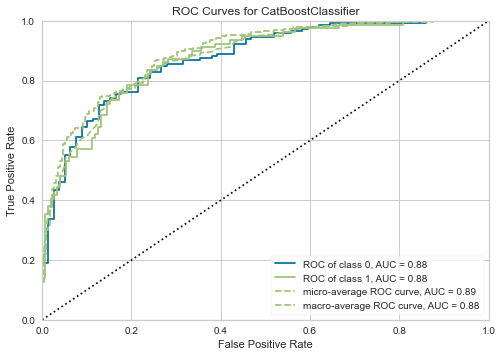

In [28]:
plot_model(best, plot='auc')

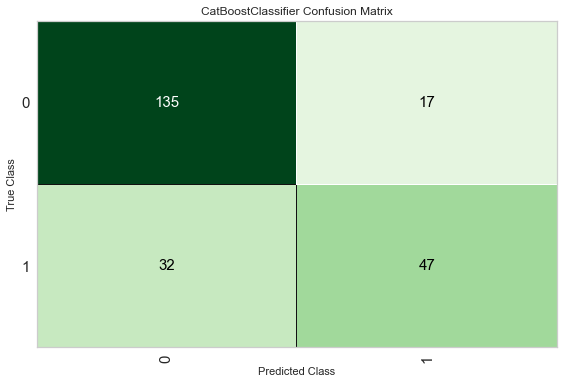

In [29]:
plot_model(best, plot='confusion_matrix')

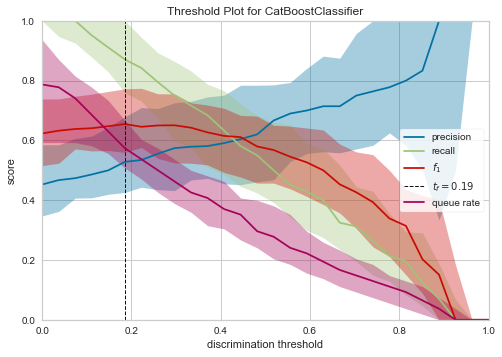

In [31]:
plot_model(best, plot='threshold')

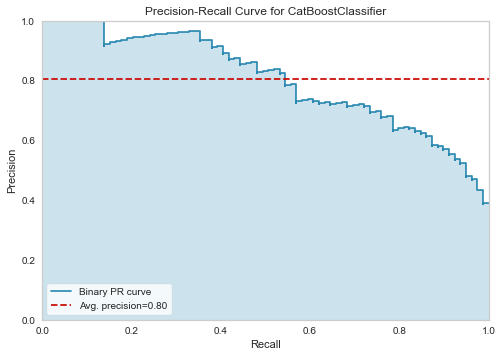

In [32]:
plot_model(best, plot='pr')

In [35]:
Tune_dt=tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6481,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6481,0.6391,0.1053,0.5000,0.1739,0.0587,0.0877
2,0.6481,0.5782,0.2105,0.5000,0.2963,0.1109,0.1294
3,0.5926,0.5459,0.3684,0.4118,0.3889,0.0847,0.0850
4,0.6481,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6481,0.6632,0.1053,0.5000,0.1739,0.0587,0.0877
6,0.6852,0.6188,0.4211,0.5714,0.4848,0.2656,0.2720
7,0.6792,0.5476,0.0556,1.0000,0.1053,0.0721,0.1934
8,0.6792,0.7252,0.6316,0.5455,0.5854,0.3261,0.3284
9,0.6415,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


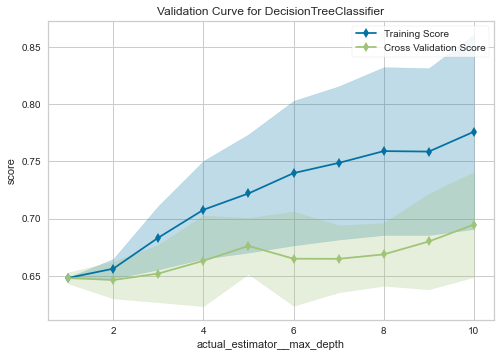

In [36]:
plot_model(Tune_dt, plot='vc')

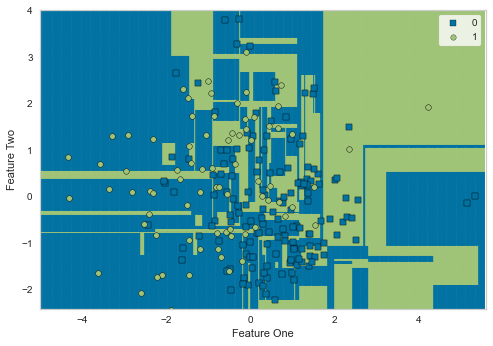

In [37]:
plot_model(dt, plot='boundary')

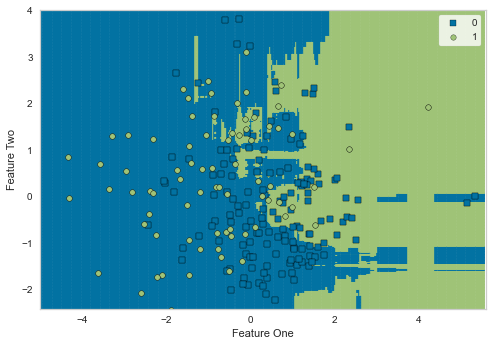

In [38]:
plot_model(best, plot='boundary')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

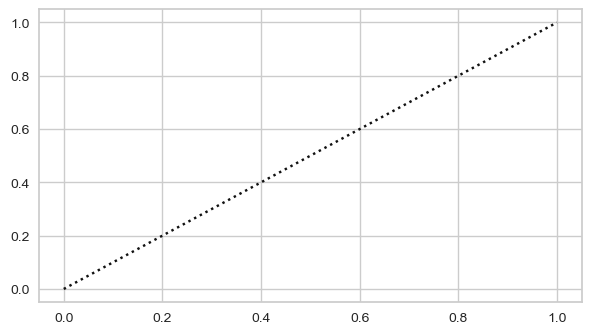

<Figure size 576x396 with 0 Axes>

In [39]:
evaluate_model(boosted_dt)

In [40]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7593,0.8000,0.6316,0.6667,0.6486,0.4658,0.4661
1,0.7778,0.8150,0.5789,0.7333,0.6471,0.4882,0.4954
2,0.6667,0.7233,0.4737,0.5294,0.5000,0.2512,0.2520
3,0.6667,0.7068,0.4737,0.5294,0.5000,0.2512,0.2520
4,0.6296,0.6556,0.5263,0.4762,0.5000,0.2070,0.2077
5,0.6852,0.7654,0.3684,0.5833,0.4516,0.2463,0.2591
6,0.6852,0.7564,0.5263,0.5556,0.5405,0.3014,0.3016
7,0.8113,0.8968,0.5556,0.8333,0.6667,0.5423,0.5640
8,0.6792,0.7183,0.5263,0.5556,0.5405,0.2944,0.2947
9,0.7358,0.7864,0.7895,0.6000,0.6818,0.4631,0.4759


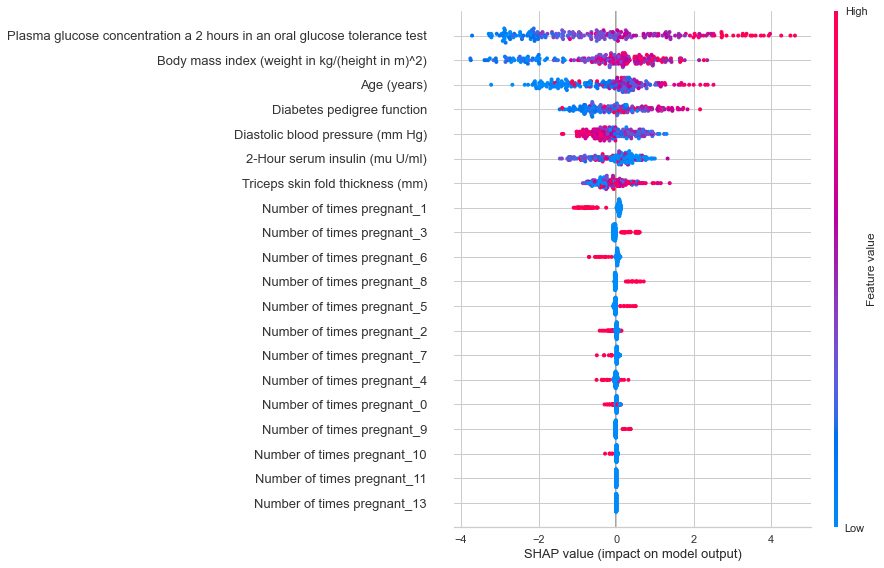

In [41]:
interpret_model(xgboost)

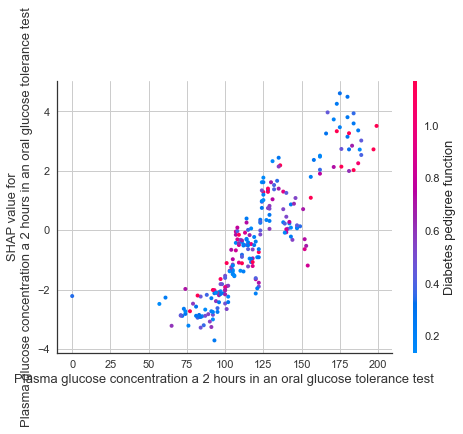

In [42]:
interpret_model(xgboost, plot='correlation')

In [43]:
interpret_model(xgboost, plot='reason', observation=1)

In [44]:
interpret_model(xgboost, plot='reason')